In [327]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [328]:
pd.set_option('display.max_columns', None)

In [329]:
# Importando a base
df = pd.read_csv('Mens_VolleyballPlusLiga_2028_2023/Mens-Volleyball-PlusLiga-2008-2023.csv')

# Convertendo para Data
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y, %H:%M', errors='coerce')

df.head()

,Date,Team_1,Team_2,T1_Score,T2_Score,T1_Sum,T1_BP,T1_Ratio,T1_Srv_Sum,T1_Srv_Err,T1_Srv_Ace,T1_Srv_Eff,T1_Rec_Sum,T1_Rec_Err,T1_Rec_Pos,T1_Rec_Perf,T1_Att_Sum,T1_Att_Err,T1_Att_Blk,T1_Att_Kill,T1_Att_Kill_Perc,T1_Att_Eff,T1_Blk_Sum,T1_Blk_As,T2_Sum,T2_BP,T2_Ratio,T2_Srv_Sum,T2_Srv_Err,T2_Srv_Ace,T2_Srv_Eff,T2_Rec_Sum,T2_Rec_Err,T2_Rec_Pos,T2_Rec_Perf,T2_Att_Sum,T2_Att_Err,T2_Att_Blk,T2_Att_Kill,T2_Att_Kill_Perc,T2_Att_Eff,T2_Blk_Sum,T2_Blk_As,Winner
0,2022-10-01 14:45:00,AZS Olsztyn,ZAKSA Kędzierzyn-Koźle,1,3,60.0,17.0,11.0,79.0,18,6.0,-13%,85.0,10.0,51%,25%,100,7.0,14.0,47.0,47%,26%,7.0,11,69,30,38,96,11,10,2%,61,6,45%,26%,88,7,7,45,51%,35%,14,11,1
1,2022-09-30 17:30:00,Jastrzębski Węgiel,GKS Katowice,3,0,51.0,17.0,27.0,77.0,15,4.0,-7%,54.0,4.0,55%,16%,88,4.0,1.0,43.0,48%,43%,4.0,8,48,16,16,70,16,4,-11%,62,4,50%,20%,91,8,4,43,47%,34%,1,17,0
2,2022-10-01 20:30:00,LUK Lublin,Czarni Radom,2,3,76.0,23.0,35.0,109.0,16,3.0,-9%,85.0,9.0,49%,21%,115,6.0,10.0,63.0,54%,40%,10.0,9,82,23,40,104,19,9,-5%,93,3,47%,18%,128,10,10,63,49%,33%,10,13,1
3,2022-10-02 14:45:00,Warta Zawiercie,PGE Skra Bełchatów,3,2,66.0,16.0,22.0,98.0,21,5.0,-16%,80.0,8.0,35%,12%,92,8.0,7.0,52.0,56%,40%,9.0,11,71,21,25,103,23,8,-8%,77,5,32%,9%,102,9,9,56,54%,37%,7,14,0
4,2022-10-03 17:30:00,BBTS Bielsko-Biała,Cuprum Lubin,1,3,63.0,22.0,17.0,100.0,19,7.0,-7%,77.0,12.0,40%,23%,97,5.0,10.0,48.0,49%,34%,8.0,10,80,30,32,103,26,12,-8%,81,7,45%,22%,109,7,8,58,53%,39%,10,10,1


In [330]:
# Filtrando a base para ter dados a partir de 2013
df = df.loc[df['Date'].dt.year >= 2020]

In [331]:
# Ordenando a base por Data e resetando os index
df.sort_values('Date', ascending=True, inplace=True)
df.reset_index(inplace=True, drop=True)

df.head()

,Date,Team_1,Team_2,T1_Score,T2_Score,T1_Sum,T1_BP,T1_Ratio,T1_Srv_Sum,T1_Srv_Err,T1_Srv_Ace,T1_Srv_Eff,T1_Rec_Sum,T1_Rec_Err,T1_Rec_Pos,T1_Rec_Perf,T1_Att_Sum,T1_Att_Err,T1_Att_Blk,T1_Att_Kill,T1_Att_Kill_Perc,T1_Att_Eff,T1_Blk_Sum,T1_Blk_As,T2_Sum,T2_BP,T2_Ratio,T2_Srv_Sum,T2_Srv_Err,T2_Srv_Ace,T2_Srv_Eff,T2_Rec_Sum,T2_Rec_Err,T2_Rec_Pos,T2_Rec_Perf,T2_Att_Sum,T2_Att_Err,T2_Att_Blk,T2_Att_Kill,T2_Att_Kill_Perc,T2_Att_Eff,T2_Blk_Sum,T2_Blk_As,Winner
0,2020-09-11 17:30:00,Stal Nysa,ZAKSA Kędzierzyn-Koźle,0,3,35.0,6.0,-1.0,50.0,12,0.0,-22%,63.0,7.0,42%,15%,74,9.0,8.0,30.0,40%,17%,5.0,5,49,23,32,73,10,7,1%,38,0,47%,15%,67,2,5,34,50%,40%,8,7,1
1,2020-09-12 14:45:00,Czarni Radom,AZS Olsztyn,3,2,72.0,28.0,31.0,107.0,26,8.0,-14%,76.0,5.0,47%,19%,103,3.0,7.0,55.0,53%,43%,9.0,10,68,27,17,101,25,5,-16%,81,8,59%,32%,110,9,9,56,50%,34%,7,17,0
2,2020-09-12 17:30:00,Cuprum Lubin,PGE Skra Bełchatów,1,3,70.0,20.0,30.0,100.0,21,4.0,-14%,80.0,4.0,36%,20%,115,8.0,7.0,59.0,51%,38%,7.0,9,71,20,33,100,20,4,-11%,79,4,48%,30%,113,7,7,60,53%,40%,7,11,1
3,2020-09-12 20:30:00,Ślepsk Malow Suwałki,GKS Katowice,0,3,47.0,12.0,19.0,67.0,9,3.0,-7%,66.0,5.0,56%,18%,85,4.0,10.0,38.0,44%,28%,6.0,5,62,24,37,75,9,5,-4%,58,3,48%,22%,90,7,6,47,52%,37%,10,12,1
4,2020-09-13 17:30:00,MKS Będzin,Projekt Warszawa,1,3,62.0,17.0,17.0,84.0,16,5.0,-11%,86.0,8.0,50%,23%,118,12.0,9.0,52.0,44%,26%,5.0,11,66,26,36,95,9,8,1%,68,5,61%,38%,98,11,5,49,50%,33%,9,14,1


In [332]:
mapeamento_colunas = {
    'Team_1': 'T1', 
    'Team_2': 'T2',
    'T1_Score': 'T1_SetsVencidos',
    'T2_Score': 'T2_SetsVencidos',
    'T1_Sum': 'T1_PontuacaoFinal',
    'T1_BP': 'T1_PontosCAProprioSaque', # Pontos marcados em um contra-ataque no seu próprio saque
    'T1_Ratio': 'T1_PontosRatio', # Pontos ganhos / Pontos perdidos
    'T1_Srv_Sum': 'T1_TotalSaques',
    'T1_Srv_Err': 'T1_TotalSaquesErrados',
    'T1_Srv_Ace': 'T1_PontosDeAce', #6
    'T1_Srv_Eff': 'T1_PercEficienciaSaque', # Entender como isso foi calculado.
    'T1_Rec_Sum': 'T1_TotalSaquesRecebidos',
    'T1_Rec_Err': 'T1_TotalSaquesNaoRecebidos',
    'T1_Rec_Pos': 'T1_PercSaquesRecebidos',# Percent of postive serve receptions
    'T1_Rec_Perf': 'T1_PercDeSaquesRecebidosPerfeitos', # Percent of perfect serve receptions
    'T1_Att_Sum': 'T1_TotalAtaques',
    'T1_Att_Err': 'T1_TotalAtaquesErrados',
    'T1_Att_Blk': 'T1_TotalAtaquesBloqueados',
    'T1_Att_Kill': 'T1_PontosDeAtaque', # 47
    'T1_Att_Kill_Perc': 'T1_PercPontosAtaque', # 47 / 100 (T1_PontosDeAtaque/T1_TotalAtaques)
    'T1_Att_Eff': 'T1_PercEficienciaAtaque', # (T1_PontosDeAtaque - T1_TotalAtaquesBloqueados - T1_TotalAtaquesBloqueados / T1_TotalAtaques)
    'T1_Blk_Sum': 'T1_PontosDeBloqueio',
    'T1_Blk_As': 'T1_TotalDeBloqueiosCA',
    
    'T2_Sum': 'T2_PontuacaoFinal',
    'T2_BP': 'T2_PontosCAProprioSaque', # Pontos marcados em um contra-ataque no seu próprio saque
    'T2_Ratio': 'T2_PontosRatio', # Pontos ganhos / Pontos perdidos
    'T2_Srv_Sum': 'T2_TotalSaques',
    'T2_Srv_Err': 'T2_TotalSaquesErrados',
    'T2_Srv_Ace': 'T2_PontosDeAce', #6
    'T2_Srv_Eff': 'T2_PercEficienciaSaque', # Entender como isso foi calculado.
    'T2_Rec_Sum': 'T2_TotalSaquesRecebidos',
    'T2_Rec_Err': 'T2_TotalSaquesNaoRecebidos',
    'T2_Rec_Pos': 'T2_PercSaquesRecebidos',# Percent of postive serve receptions
    'T2_Rec_Perf': 'T2_PercDeSaquesRecebidosPerfeitos', # Percent of perfect serve receptions
    'T2_Att_Sum': 'T2_TotalAtaques',
    'T2_Att_Err': 'T2_TotalAtaquesErrados',
    'T2_Att_Blk': 'T2_TotalAtaquesBloqueados',
    'T2_Att_Kill': 'T2_PontosDeAtaque', # 47
    'T2_Att_Kill_Perc': 'T2_PercPontosAtaque', # 47 / 100 (T1_PontosDeAtaque/T1_TotalAtaques)
    'T2_Att_Eff': 'T2_PercEficienciaAtaque', # (T1_PontosDeAtaque - T1_TotalAtaquesBloqueados - T1_TotalAtaquesBloqueados / T1_TotalAtaques)
    'T2_Blk_Sum': 'T2_PontosDeBloqueio',
    'T2_Blk_As': 'T2_TotalDeBloqueiosCA',
    'Winner': 'Flag_Vencedor' # 0 if Team 1 won, 1 if Team 2 won
    
}
df.rename(columns=mapeamento_colunas, inplace=True)
df.head()

,Date,T1,T2,T1_SetsVencidos,T2_SetsVencidos,T1_PontuacaoFinal,T1_PontosCAProprioSaque,T1_PontosRatio,T1_TotalSaques,T1_TotalSaquesErrados,T1_PontosDeAce,T1_PercEficienciaSaque,T1_TotalSaquesRecebidos,T1_TotalSaquesNaoRecebidos,T1_PercSaquesRecebidos,T1_PercDeSaquesRecebidosPerfeitos,T1_TotalAtaques,T1_TotalAtaquesErrados,T1_TotalAtaquesBloqueados,T1_PontosDeAtaque,T1_PercPontosAtaque,T1_PercEficienciaAtaque,T1_PontosDeBloqueio,T1_TotalDeBloqueiosCA,T2_PontuacaoFinal,T2_PontosCAProprioSaque,T2_PontosRatio,T2_TotalSaques,T2_TotalSaquesErrados,T2_PontosDeAce,T2_PercEficienciaSaque,T2_TotalSaquesRecebidos,T2_TotalSaquesNaoRecebidos,T2_PercSaquesRecebidos,T2_PercDeSaquesRecebidosPerfeitos,T2_TotalAtaques,T2_TotalAtaquesErrados,T2_TotalAtaquesBloqueados,T2_PontosDeAtaque,T2_PercPontosAtaque,T2_PercEficienciaAtaque,T2_PontosDeBloqueio,T2_TotalDeBloqueiosCA,Flag_Vencedor
0,2020-09-11 17:30:00,Stal Nysa,ZAKSA Kędzierzyn-Koźle,0,3,35.0,6.0,-1.0,50.0,12,0.0,-22%,63.0,7.0,42%,15%,74,9.0,8.0,30.0,40%,17%,5.0,5,49,23,32,73,10,7,1%,38,0,47%,15%,67,2,5,34,50%,40%,8,7,1
1,2020-09-12 14:45:00,Czarni Radom,AZS Olsztyn,3,2,72.0,28.0,31.0,107.0,26,8.0,-14%,76.0,5.0,47%,19%,103,3.0,7.0,55.0,53%,43%,9.0,10,68,27,17,101,25,5,-16%,81,8,59%,32%,110,9,9,56,50%,34%,7,17,0
2,2020-09-12 17:30:00,Cuprum Lubin,PGE Skra Bełchatów,1,3,70.0,20.0,30.0,100.0,21,4.0,-14%,80.0,4.0,36%,20%,115,8.0,7.0,59.0,51%,38%,7.0,9,71,20,33,100,20,4,-11%,79,4,48%,30%,113,7,7,60,53%,40%,7,11,1
3,2020-09-12 20:30:00,Ślepsk Malow Suwałki,GKS Katowice,0,3,47.0,12.0,19.0,67.0,9,3.0,-7%,66.0,5.0,56%,18%,85,4.0,10.0,38.0,44%,28%,6.0,5,62,24,37,75,9,5,-4%,58,3,48%,22%,90,7,6,47,52%,37%,10,12,1
4,2020-09-13 17:30:00,MKS Będzin,Projekt Warszawa,1,3,62.0,17.0,17.0,84.0,16,5.0,-11%,86.0,8.0,50%,23%,118,12.0,9.0,52.0,44%,26%,5.0,11,66,26,36,95,9,8,1%,68,5,61%,38%,98,11,5,49,50%,33%,9,14,1


In [333]:
# Criar a coluna 'Nome_Time_Vencedor' com base na condição em 'Flag_Vencedor'
df['Nome_Time_Vencedor'] = np.where(df['Flag_Vencedor'] == 0, df['T1'], df['T2'])

# Criar a coluna 'Time_Vencedor' com base na condição em 'Flag_Vencedor'
df['Time_Vencedor'] = np.where(df['Flag_Vencedor'] == 0, 'T1', 'T2')

# Criar a coluna de percentual de pontos de bloqueio em relação ao total de pontos
df['T1_Perc_Bloqueio'] = (df['T1_PontosDeBloqueio'] / df['T1_PontuacaoFinal']) * 100
df['T2_Perc_Bloqueio'] = (df['T2_PontosDeBloqueio'] / df['T2_PontuacaoFinal']) * 100

df['T1_Perc_Bloqueio'] = df['T1_Perc_Bloqueio'].round(1)
df['T2_Perc_Bloqueio'] = df['T2_Perc_Bloqueio'].round(1)


df.head()

,Date,T1,T2,T1_SetsVencidos,T2_SetsVencidos,T1_PontuacaoFinal,T1_PontosCAProprioSaque,T1_PontosRatio,T1_TotalSaques,T1_TotalSaquesErrados,T1_PontosDeAce,T1_PercEficienciaSaque,T1_TotalSaquesRecebidos,T1_TotalSaquesNaoRecebidos,T1_PercSaquesRecebidos,T1_PercDeSaquesRecebidosPerfeitos,T1_TotalAtaques,T1_TotalAtaquesErrados,T1_TotalAtaquesBloqueados,T1_PontosDeAtaque,T1_PercPontosAtaque,T1_PercEficienciaAtaque,T1_PontosDeBloqueio,T1_TotalDeBloqueiosCA,T2_PontuacaoFinal,T2_PontosCAProprioSaque,T2_PontosRatio,T2_TotalSaques,T2_TotalSaquesErrados,T2_PontosDeAce,T2_PercEficienciaSaque,T2_TotalSaquesRecebidos,T2_TotalSaquesNaoRecebidos,T2_PercSaquesRecebidos,T2_PercDeSaquesRecebidosPerfeitos,T2_TotalAtaques,T2_TotalAtaquesErrados,T2_TotalAtaquesBloqueados,T2_PontosDeAtaque,T2_PercPontosAtaque,T2_PercEficienciaAtaque,T2_PontosDeBloqueio,T2_TotalDeBloqueiosCA,Flag_Vencedor,Nome_Time_Vencedor,Time_Vencedor,T1_Perc_Bloqueio,T2_Perc_Bloqueio
0,2020-09-11 17:30:00,Stal Nysa,ZAKSA Kędzierzyn-Koźle,0,3,35.0,6.0,-1.0,50.0,12,0.0,-22%,63.0,7.0,42%,15%,74,9.0,8.0,30.0,40%,17%,5.0,5,49,23,32,73,10,7,1%,38,0,47%,15%,67,2,5,34,50%,40%,8,7,1,ZAKSA Kędzierzyn-Koźle,T2,14.3,16.3
1,2020-09-12 14:45:00,Czarni Radom,AZS Olsztyn,3,2,72.0,28.0,31.0,107.0,26,8.0,-14%,76.0,5.0,47%,19%,103,3.0,7.0,55.0,53%,43%,9.0,10,68,27,17,101,25,5,-16%,81,8,59%,32%,110,9,9,56,50%,34%,7,17,0,Czarni Radom,T1,12.5,10.3
2,2020-09-12 17:30:00,Cuprum Lubin,PGE Skra Bełchatów,1,3,70.0,20.0,30.0,100.0,21,4.0,-14%,80.0,4.0,36%,20%,115,8.0,7.0,59.0,51%,38%,7.0,9,71,20,33,100,20,4,-11%,79,4,48%,30%,113,7,7,60,53%,40%,7,11,1,PGE Skra Bełchatów,T2,10.0,9.9
3,2020-09-12 20:30:00,Ślepsk Malow Suwałki,GKS Katowice,0,3,47.0,12.0,19.0,67.0,9,3.0,-7%,66.0,5.0,56%,18%,85,4.0,10.0,38.0,44%,28%,6.0,5,62,24,37,75,9,5,-4%,58,3,48%,22%,90,7,6,47,52%,37%,10,12,1,GKS Katowice,T2,12.8,16.1
4,2020-09-13 17:30:00,MKS Będzin,Projekt Warszawa,1,3,62.0,17.0,17.0,84.0,16,5.0,-11%,86.0,8.0,50%,23%,118,12.0,9.0,52.0,44%,26%,5.0,11,66,26,36,95,9,8,1%,68,5,61%,38%,98,11,5,49,50%,33%,9,14,1,Projekt Warszawa,T2,8.1,13.6


In [334]:
df.columns

Index(['Date', 'T1', 'T2', 'T1_SetsVencidos', 'T2_SetsVencidos',
       'T1_PontuacaoFinal', 'T1_PontosCAProprioSaque', 'T1_PontosRatio',
       'T1_TotalSaques', 'T1_TotalSaquesErrados', 'T1_PontosDeAce',
       'T1_PercEficienciaSaque', 'T1_TotalSaquesRecebidos',
       'T1_TotalSaquesNaoRecebidos', 'T1_PercSaquesRecebidos',
       'T1_PercDeSaquesRecebidosPerfeitos', 'T1_TotalAtaques',
       'T1_TotalAtaquesErrados', 'T1_TotalAtaquesBloqueados',
       'T1_PontosDeAtaque', 'T1_PercPontosAtaque', 'T1_PercEficienciaAtaque',
       'T1_PontosDeBloqueio', 'T1_TotalDeBloqueiosCA', 'T2_PontuacaoFinal',
       'T2_PontosCAProprioSaque', 'T2_PontosRatio', 'T2_TotalSaques',
       'T2_TotalSaquesErrados', 'T2_PontosDeAce', 'T2_PercEficienciaSaque',
       'T2_TotalSaquesRecebidos', 'T2_TotalSaquesNaoRecebidos',
       'T2_PercSaquesRecebidos', 'T2_PercDeSaquesRecebidosPerfeitos',
       'T2_TotalAtaques', 'T2_TotalAtaquesErrados',
       'T2_TotalAtaquesBloqueados', 'T2_PontosDeAtaque', 'T2

In [335]:
ordenacao_colunas = [
    'Date', 'T1', 'T2', 'Flag_Vencedor', 'Time_Vencedor', 'Nome_Time_Vencedor', 'T1_SetsVencidos', 
    'T2_SetsVencidos','T1_PontuacaoFinal', 'T1_PontosCAProprioSaque', 'T1_PontosRatio',
    'T1_TotalSaques', 'T1_TotalSaquesErrados', 'T1_PontosDeAce',
    'T1_PercEficienciaSaque', 'T1_TotalSaquesRecebidos',
    'T1_TotalSaquesNaoRecebidos', 'T1_PercSaquesRecebidos',
    'T1_PercDeSaquesRecebidosPerfeitos', 'T1_TotalAtaques',
    'T1_TotalAtaquesErrados', 'T1_TotalAtaquesBloqueados',
    'T1_PontosDeAtaque', 'T1_PercPontosAtaque', 'T1_PercEficienciaAtaque',
    'T1_PontosDeBloqueio', 'T1_Perc_Bloqueio','T1_TotalDeBloqueiosCA', 'T2_PontuacaoFinal',
    'T2_PontosCAProprioSaque', 'T2_PontosRatio', 'T2_TotalSaques',
    'T2_TotalSaquesErrados', 'T2_PontosDeAce', 'T2_PercEficienciaSaque',
    'T2_TotalSaquesRecebidos', 'T2_TotalSaquesNaoRecebidos',
    'T2_PercSaquesRecebidos', 'T2_PercDeSaquesRecebidosPerfeitos',
    'T2_TotalAtaques', 'T2_TotalAtaquesErrados',
    'T2_TotalAtaquesBloqueados', 'T2_PontosDeAtaque', 'T2_PercPontosAtaque',
    'T2_PercEficienciaAtaque', 'T2_PontosDeBloqueio', 'T2_Perc_Bloqueio',
    'T2_TotalDeBloqueiosCA'
]
df = df[ordenacao_colunas]
df

,Date,T1,T2,Flag_Vencedor,Time_Vencedor,Nome_Time_Vencedor,T1_SetsVencidos,T2_SetsVencidos,T1_PontuacaoFinal,T1_PontosCAProprioSaque,T1_PontosRatio,T1_TotalSaques,T1_TotalSaquesErrados,T1_PontosDeAce,T1_PercEficienciaSaque,T1_TotalSaquesRecebidos,T1_TotalSaquesNaoRecebidos,T1_PercSaquesRecebidos,T1_PercDeSaquesRecebidosPerfeitos,T1_TotalAtaques,T1_TotalAtaquesErrados,T1_TotalAtaquesBloqueados,T1_PontosDeAtaque,T1_PercPontosAtaque,T1_PercEficienciaAtaque,T1_PontosDeBloqueio,T1_Perc_Bloqueio,T1_TotalDeBloqueiosCA,T2_PontuacaoFinal,T2_PontosCAProprioSaque,T2_PontosRatio,T2_TotalSaques,T2_TotalSaquesErrados,T2_PontosDeAce,T2_PercEficienciaSaque,T2_TotalSaquesRecebidos,T2_TotalSaquesNaoRecebidos,T2_PercSaquesRecebidos,T2_PercDeSaquesRecebidosPerfeitos,T2_TotalAtaques,T2_TotalAtaquesErrados,T2_TotalAtaquesBloqueados,T2_PontosDeAtaque,T2_PercPontosAtaque,T2_PercEficienciaAtaque,T2_PontosDeBloqueio,T2_Perc_Bloqueio,T2_TotalDeBloqueiosCA
0,2020-09-11 17:30:00,Stal Nysa,ZAKSA Kędzierzyn-Koźle,1,T2,ZAKSA Kędzierzyn-Koźle,0,3,35.0,6.0,-1.0,50.0,12,0.0,-22%,63.0,7.0,42%,15%,74,9.0,8.0,30.0,40%,17%,5.0,14.3,5,49,23,32,73,10,7,1%,38,0,47%,15%,67,2,5,34,50%,40%,8,16.3,7
1,2020-09-12 14:45:00,Czarni Radom,AZS Olsztyn,0,T1,Czarni Radom,3,2,72.0,28.0,31.0,107.0,26,8.0,-14%,76.0,5.0,47%,19%,103,3.0,7.0,55.0,53%,43%,9.0,12.5,10,68,27,17,101,25,5,-16%,81,8,59%,32%,110,9,9,56,50%,34%,7,10.3,17
2,2020-09-12 17:30:00,Cuprum Lubin,PGE Skra Bełchatów,1,T2,PGE Skra Bełchatów,1,3,70.0,20.0,30.0,100.0,21,4.0,-14%,80.0,4.0,36%,20%,115,8.0,7.0,59.0,51%,38%,7.0,10.0,9,71,20,33,100,20,4,-11%,79,4,48%,30%,113,7,7,60,53%,40%,7,9.9,11
3,2020-09-12 20:30:00,Ślepsk Malow Suwałki,GKS Katowice,1,T2,GKS Katowice,0,3,47.0,12.0,19.0,67.0,9,3.0,-7%,66.0,5.0,56%,18%,85,4.0,10.0,38.0,44%,28%,6.0,12.8,5,62,24,37,75,9,5,-4%,58,3,48%,22%,90,7,6,47,52%,37%,10,16.1,12
4,2020-09-13 17:30:00,MKS Będzin,Projekt Warszawa,1,T2,Projekt Warszawa,1,3,62.0,17.0,17.0,84.0,16,5.0,-11%,86.0,8.0,50%,23%,118,12.0,9.0,52.0,44%,26%,5.0,8.1,11,66,26,36,95,9,8,1%,68,5,61%,38%,98,11,5,49,50%,33%,9,13.6,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,2023-03-03 17:30:00,AZS Olsztyn,Barkom Każany Lwów,0,T1,AZS Olsztyn,3,0,55.0,24.0,33.0,73.0,14,6.0,-4%,48.0,3.0,45%,29%,72,5.0,5.0,39.0,54%,40%,10.0,18.2,7,36,10,13,58,10,3,-10%,59,6,28%,15%,74,7,10,28,37%,14%,5,13.9,7
624,2023-03-04 14:45:00,Warta Zawiercie,Asseco Resovia,0,T1,Warta Zawiercie,3,0,50.0,23.0,30.0,73.0,13,10.0,-2%,40.0,3.0,52%,22%,70,4.0,10.0,35.0,50%,30%,5.0,10.0,9,40,9,6,59,19,3,-25%,60,10,40%,20%,63,5,5,27,42%,26%,10,25.0,4
625,2023-03-04 17:30:00,Jastrzębski Węgiel,Ślepsk Malow Suwałki,0,T1,Jastrzębski Węgiel,3,1,74.0,31.0,48.0,96.0,17,9.0,-2%,57.0,7.0,40%,17%,77,1.0,4.0,58.0,75%,68%,7.0,9.5,4,51,12,20,71,14,7,-7%,79,9,34%,10%,77,8,7,41,53%,33%,3,5.9,5
626,2023-03-04 20:30:00,ZAKSA Kędzierzyn-Koźle,Cuprum Lubin,0,T1,ZAKSA Kędzierzyn-Koźle,3,1,63.0,27.0,33.0,97.0,16,7.0,-3%,65.0,9.0,32%,18%,84,5.0,6.0,43.0,51%,38%,13.0,20.6,8,63,19,25,88,23,9,-15%,81,7,51%,22%,96,7,13,48,50%,29%,6,9.5,10


### Excluindo algumas colunas da base 

In [336]:
df_filtrada = df.drop(columns={
    'Flag_Vencedor', 
    'T1_PontosCAProprioSaque', 
    'T1_PontosRatio', 
    'T1_TotalSaquesRecebidos', 
    'T1_TotalSaquesNaoRecebidos',
    'T1_PercSaquesRecebidos',
    'T1_PercDeSaquesRecebidosPerfeitos',
    'T1_TotalSaques',
    'T1_TotalSaquesErrados',
    'T1_PercEficienciaSaque',
    'T1_TotalAtaques',
    'T1_TotalAtaquesErrados',
    'T1_TotalAtaquesBloqueados',
    
    
    
    'T2_PontosCAProprioSaque', 
    'T2_PontosRatio', 
    'T2_TotalSaquesRecebidos', 
    'T2_TotalSaquesNaoRecebidos',
    'T2_PercSaquesRecebidos',
    'T2_PercDeSaquesRecebidosPerfeitos',
    'T2_TotalSaques',
    'T2_TotalSaquesErrados',
    'T2_PercEficienciaSaque',
    'T2_TotalAtaques',
    'T2_TotalAtaquesErrados',
    'T2_TotalAtaquesBloqueados'
})

df_filtrada

,Date,T1,T2,Time_Vencedor,Nome_Time_Vencedor,T1_SetsVencidos,T2_SetsVencidos,T1_PontuacaoFinal,T1_PontosDeAce,T1_PontosDeAtaque,T1_PercPontosAtaque,T1_PercEficienciaAtaque,T1_PontosDeBloqueio,T1_Perc_Bloqueio,T1_TotalDeBloqueiosCA,T2_PontuacaoFinal,T2_PontosDeAce,T2_PontosDeAtaque,T2_PercPontosAtaque,T2_PercEficienciaAtaque,T2_PontosDeBloqueio,T2_Perc_Bloqueio,T2_TotalDeBloqueiosCA
0,2020-09-11 17:30:00,Stal Nysa,ZAKSA Kędzierzyn-Koźle,T2,ZAKSA Kędzierzyn-Koźle,0,3,35.0,0.0,30.0,40%,17%,5.0,14.3,5,49,7,34,50%,40%,8,16.3,7
1,2020-09-12 14:45:00,Czarni Radom,AZS Olsztyn,T1,Czarni Radom,3,2,72.0,8.0,55.0,53%,43%,9.0,12.5,10,68,5,56,50%,34%,7,10.3,17
2,2020-09-12 17:30:00,Cuprum Lubin,PGE Skra Bełchatów,T2,PGE Skra Bełchatów,1,3,70.0,4.0,59.0,51%,38%,7.0,10.0,9,71,4,60,53%,40%,7,9.9,11
3,2020-09-12 20:30:00,Ślepsk Malow Suwałki,GKS Katowice,T2,GKS Katowice,0,3,47.0,3.0,38.0,44%,28%,6.0,12.8,5,62,5,47,52%,37%,10,16.1,12
4,2020-09-13 17:30:00,MKS Będzin,Projekt Warszawa,T2,Projekt Warszawa,1,3,62.0,5.0,52.0,44%,26%,5.0,8.1,11,66,8,49,50%,33%,9,13.6,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,2023-03-03 17:30:00,AZS Olsztyn,Barkom Każany Lwów,T1,AZS Olsztyn,3,0,55.0,6.0,39.0,54%,40%,10.0,18.2,7,36,3,28,37%,14%,5,13.9,7
624,2023-03-04 14:45:00,Warta Zawiercie,Asseco Resovia,T1,Warta Zawiercie,3,0,50.0,10.0,35.0,50%,30%,5.0,10.0,9,40,3,27,42%,26%,10,25.0,4
625,2023-03-04 17:30:00,Jastrzębski Węgiel,Ślepsk Malow Suwałki,T1,Jastrzębski Węgiel,3,1,74.0,9.0,58.0,75%,68%,7.0,9.5,4,51,7,41,53%,33%,3,5.9,5
626,2023-03-04 20:30:00,ZAKSA Kędzierzyn-Koźle,Cuprum Lubin,T1,ZAKSA Kędzierzyn-Koźle,3,1,63.0,7.0,43.0,51%,38%,13.0,20.6,8,63,9,48,50%,29%,6,9.5,10


## CONTAGEM DE VITÓRIAS POR TIME

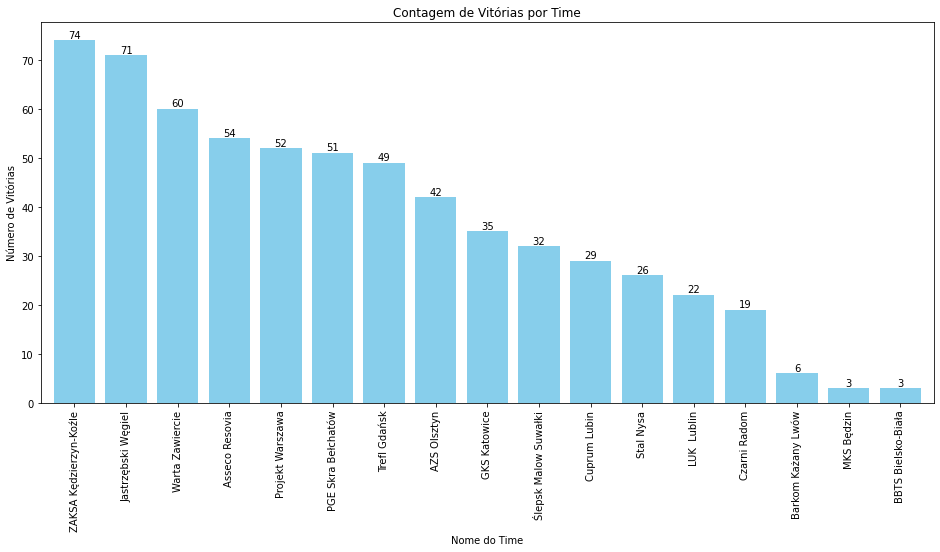

In [354]:
# Contar o número de vitórias para cada time
contagem_vitorias = df_filtrada['Nome_Time_Vencedor'].value_counts()

# Criar um gráfico de barras com rótulos de dados e largura ajustada
fig, ax = plt.subplots(figsize=(16, 7))  # Ajustar o tamanho do gráfico
contagem_vitorias.plot(kind='bar', color='skyblue', ax=ax, width=0.8)  # Ajustar a largura das barras

# Adicionar rótulos de dados acima das barras
for i, v in enumerate(contagem_vitorias):
    ax.text(i, v + 0.1, str(v), color='black', ha='center', va='bottom')

# Configurar o título e os rótulos do eixo
plt.title('Contagem de Vitórias por Time')
plt.xlabel('Nome do Time')
plt.ylabel('Número de Vitórias')

plt.show()

## MÉDIA DE PERCENTUAL DE BLOQUEIO POR TIME

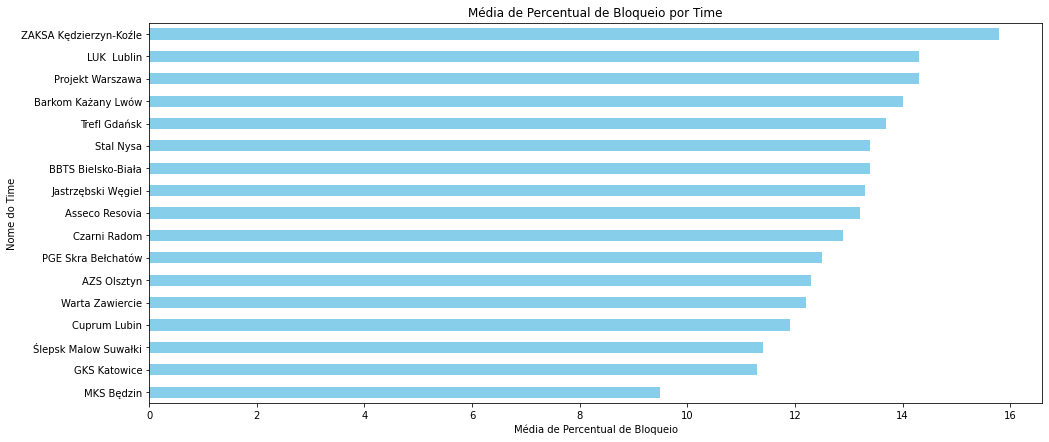

In [343]:
# Concatenar as colunas de percentual de bloqueio de TIME1 e TIME2
percentual_bloqueio = pd.concat([df_filtrada['T1_Perc_Bloqueio'], df_filtrada['T2_Perc_Bloqueio']])

# Calcular a média para cada time
media_por_time = percentual_bloqueio.groupby(pd.concat([df['T1'], df['T2']])).mean().round(1)

# Criar um gráfico de barras horizontal
fig, ax = plt.subplots(figsize=(16, 7))
media_por_time.sort_values().plot(kind='barh', color='skyblue', ax=ax)

# # Adicionar rótulos de dados acima das barras
# for i, v in enumerate(media_por_time):
#     ax.text(i, v + 0.1, str(v), color='black', ha='center', va='bottom')

# Configurar o título e os rótulos do eixo
plt.title('Média de Percentual de Bloqueio por Time')
plt.xlabel('Média de Percentual de Bloqueio')
plt.ylabel('Nome do Time')

# Exibir o gráfico
plt.show()

In [353]:
# Criar um DataFrame combinando médias de bloqueio e contagem de vitórias
df_relacao = pd.DataFrame({'Media_Bloqueio': media_por_time, 'Contagem_Vitorias': contagem_vitorias})
df_relacao = df_relacao.sort_values(by=['Contagem_Vitorias', 'Media_Bloqueio'], ascending=[False, True])
df_relacao

,Media_Bloqueio,Contagem_Vitorias
ZAKSA Kędzierzyn-Koźle,15.8,74
Jastrzębski Węgiel,13.3,71
Warta Zawiercie,12.2,60
Asseco Resovia,13.2,54
Projekt Warszawa,14.3,52
PGE Skra Bełchatów,12.5,51
Trefl Gdańsk,13.7,49
AZS Olsztyn,12.3,42
GKS Katowice,11.3,35
Ślepsk Malow Suwałki,11.4,32


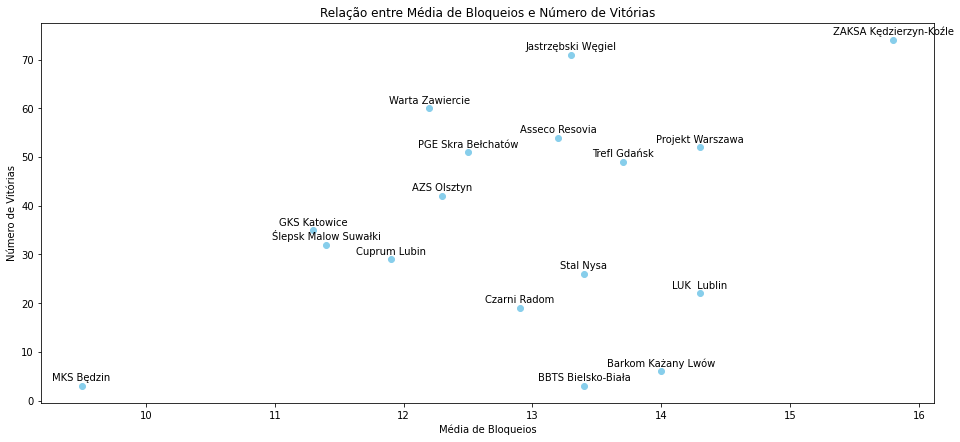

In [355]:
# Criar um gráfico de dispersão
plt.figure(figsize=(16, 7))
plt.scatter(df_relacao['Media_Bloqueio'], df_relacao['Contagem_Vitorias'], color='skyblue')

# Adicionar rótulos aos pontos
for i, nome_time in enumerate(df_relacao.index):
    plt.annotate(nome_time, (df_relacao['Media_Bloqueio'][i], df_relacao['Contagem_Vitorias'][i]), textcoords="offset points", xytext=(0, 5), ha='center')

# Configurar o título e os rótulos do eixo
plt.title('Relação entre Média de Bloqueios e Número de Vitórias')
plt.xlabel('Média de Bloqueios')
plt.ylabel('Número de Vitórias')

# Exibir o gráfico
plt.show()
